In [7]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from pandas_datareader import data, wb
import pprint
import statsmodels.tsa.stattools as ts


def plot_price_series(df, ts1, ts2):
    months = mdates.MonthLocator()  # every month
    fig, ax = plt.subplots()
    ax.plot(df.index, df[ts1], label=ts1)
    ax.plot(df.index, df[ts2], label=ts2)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_xlim(datetime.datetime(2012, 1, 1), datetime.datetime(2013, 1, 1))
    ax.grid(True)
    fig.autofmt_xdate()

    plt.xlabel('Month/Year')
    plt.ylabel('Price ($)')
    plt.title('%s and %s Daily Prices' % (ts1, ts2))
    plt.legend()
    plt.show()

def plot_scatter_series(df, ts1, ts2):
    plt.xlabel('%s Price ($)' % ts1)
    plt.ylabel('%s Price ($)' % ts2)
    plt.title('%s and %s Price Scatterplot' % (ts1, ts2))
    plt.scatter(df[ts1], df[ts2])
    plt.show()

def plot_residuals(df):
    months = mdates.MonthLocator()  # every month
    fig, ax = plt.subplots()
    ax.plot(df.index, df["res"], label="Residuals")
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_xlim(datetime.datetime(2012, 1, 1), datetime.datetime(2013, 1, 1))
    ax.grid(True)
    fig.autofmt_xdate()

    plt.xlabel('Month/Year')
    plt.ylabel('Price ($)')
    plt.title('Residual Plot')
    plt.legend()

    plt.plot(df["res"])
    plt.show()


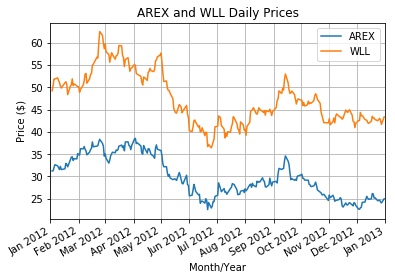

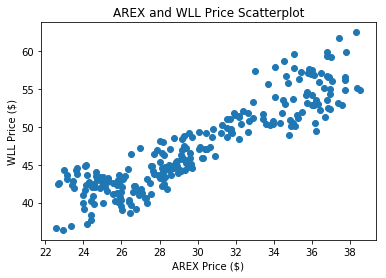

NameError: name 'ols' is not defined

In [9]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2013, 1, 1)

arex = data.DataReader("AREX", "yahoo", start, end)
wll = data.DataReader("WLL", "yahoo", start, end)

df = pd.DataFrame(index=arex.index)
df["AREX"] = arex["Adj Close"]
df["WLL"] = wll["Adj Close"]

# Plot the two time series
plot_price_series(df, "AREX", "WLL")

# Display a scatter plot of the two time series
plot_scatter_series(df, "AREX", "WLL")

# Calculate optimal hedge ratio "beta"
res = ols(y=df['WLL'], x=df["AREX"])
beta_hr = res.beta.x

# Calculate the residuals of the linear combination
df["res"] = df["WLL"] - beta_hr*df["AREX"]

# Plot the residuals
plot_residuals(df)

# Calculate and output the CADF test on the residuals
cadf = ts.adfuller(df["res"])
pprint.pprint(cadf)
